## Task - III : To Cluster Data Based On Given Parameter (Unsupervised Learning)

### Predict Optimum number of Clusters and represent it visually

### Let's Import Data and clean , and handle missing values

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### As we observed that data is already good for use , we don't need to normalize it , as all of them have same unit

### So, let's apply KMeans-Clustering Algorithms to divide them

In [3]:
from sklearn.cluster import KMeans

In [4]:
Ks = range(1,12)

In [5]:
sse=[]
for i in Ks:
    p = KMeans(n_clusters=i)
    p.fit_predict(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
    sse.append(p.inertia_)
sse

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.93873974358975,
 34.41285769230769,
 29.887696448288555,
 28.13892385553255,
 26.12513383838385,
 24.280157384411257]

In [6]:
# lets plot graph to get best value for clustering
import matplotlib.pyplot as plt
%matplotlib inline

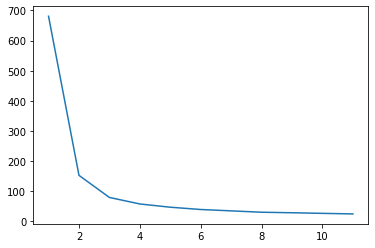

In [7]:
plt.plot(Ks,sse)
plt.show()


### So as in graph , their is a deep slope at n_cluster=3 , so 3 is the most optimal value for it. So let's plot for clusters=3

In [8]:
best_cluster=3 # previous result
yh = KMeans(n_clusters=best_cluster,random_state=0)
yh = yh.fit_predict(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
yh

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [9]:
df['Cluster_no']=yh
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_no
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


### Now lets plot graph for it

In [10]:
# df1=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Cluster_no']]
df1=df[df.Cluster_no==0]
df2=df[df.Cluster_no==1] 
df3=df[df.Cluster_no==2]

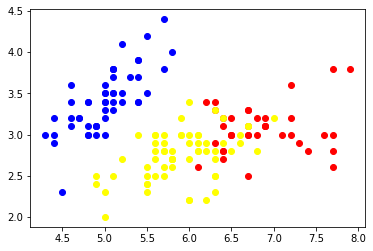

In [11]:
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color='red')
plt.scatter(df2['SepalLengthCm'],df2['SepalWidthCm'],color='blue')
plt.scatter(df3['SepalLengthCm'],df3['SepalWidthCm'],color='yellow')
plt.show()

### If we want , we can differ clusters based on their species by assigning them different color 

In [12]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

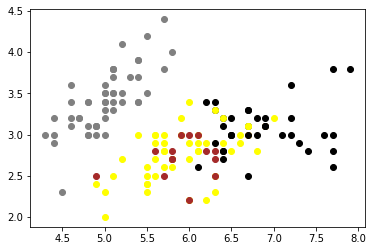

In [13]:
df1=df[df.Cluster_no==0]
df2=df[df.Cluster_no==1]
df3=df[df.Cluster_no==2]
df4=df1[df1.Species=='Iris-setosa']
df5=df1[df1.Species=='Iris-versicolor'] 
df6=df1[df1.Species=='Iris-virginica']
df7=df2[df2.Species=='Iris-setosa']
df8=df2[df2.Species=='Iris-versicolor']
df9=df2[df2.Species=='Iris-virginica']
df10=df3[df3.Species=='Iris-setosa']
df11=df3[df3.Species=='Iris-versicolor']
df12=df3[df3.Species=='Iris-virginica']
# df3 4-12
plt.scatter(df4['SepalLengthCm'],df4['SepalWidthCm'],color='blue')
plt.scatter(df5['SepalLengthCm'],df5['SepalWidthCm'],color='orange')
plt.scatter(df6['SepalLengthCm'],df6['SepalWidthCm'],color='black')
plt.scatter(df7['SepalLengthCm'],df7['SepalWidthCm'],color='grey')
plt.scatter(df8['SepalLengthCm'],df8['SepalWidthCm'],color='violet')
plt.scatter(df9['SepalLengthCm'],df9['SepalWidthCm'],color='red' )
plt.scatter(df10['SepalLengthCm'],df10['SepalWidthCm'],color='green' )
plt.scatter(df11['SepalLengthCm'],df11['SepalWidthCm'],color='yellow' )
plt.scatter(df12['SepalLengthCm'],df12['SepalWidthCm'],color='brown' )

plt.show()

### here different color represents , its cluster and species

### So dividing our set in 3 clusters is most feasible .

##  finally we clustered and plotted our task using KMeans 

In [14]:
df.to_csv('iris.csv')

In [15]:
# saved data set